# Boston House Price Prediction

### importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
1https://archive.ics.uci.edu/ml/datasets/Housing
123
20.2. Load the Dataset 124
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to ﬁve Boston employment centers
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000
PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

In [2]:
df = pd.read_csv("C:\\Users\\Public\\HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

#### replacing the null values

In [5]:
df['CHAS'] = df['CHAS'].fillna(0)
df['ZN'] = df['ZN'].fillna(df['ZN'].median())
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Feature Selection

<Axes: >

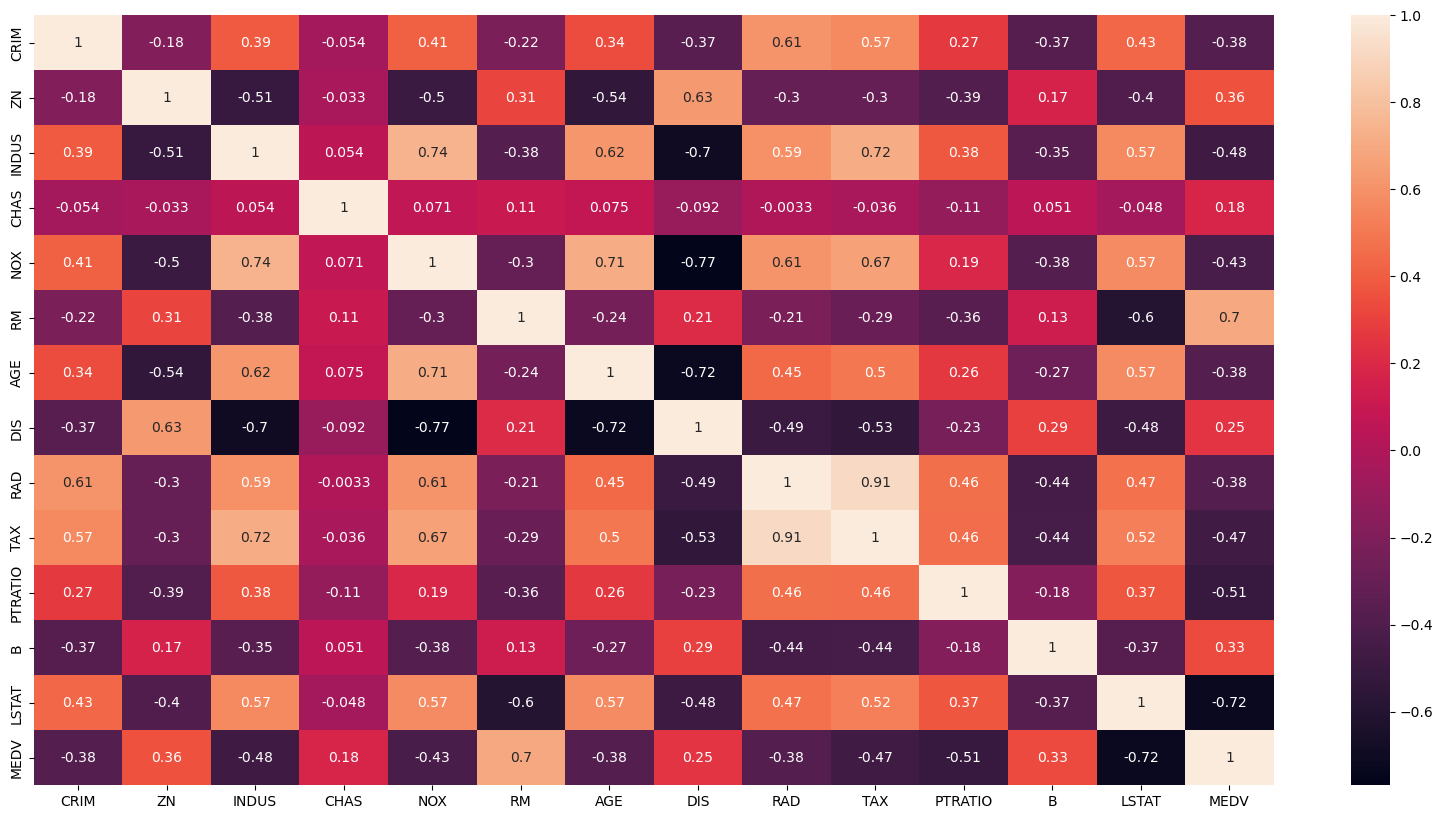

In [6]:
cor_coef = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor_coef, annot=True, cmap='rocket')

We can see that LSTAT and RM are highly correlated with MEDV.

Also CHAS and DIS are least correlated with MEDV so we can drop these features to avoid anomalies.

#### Detecting outliers

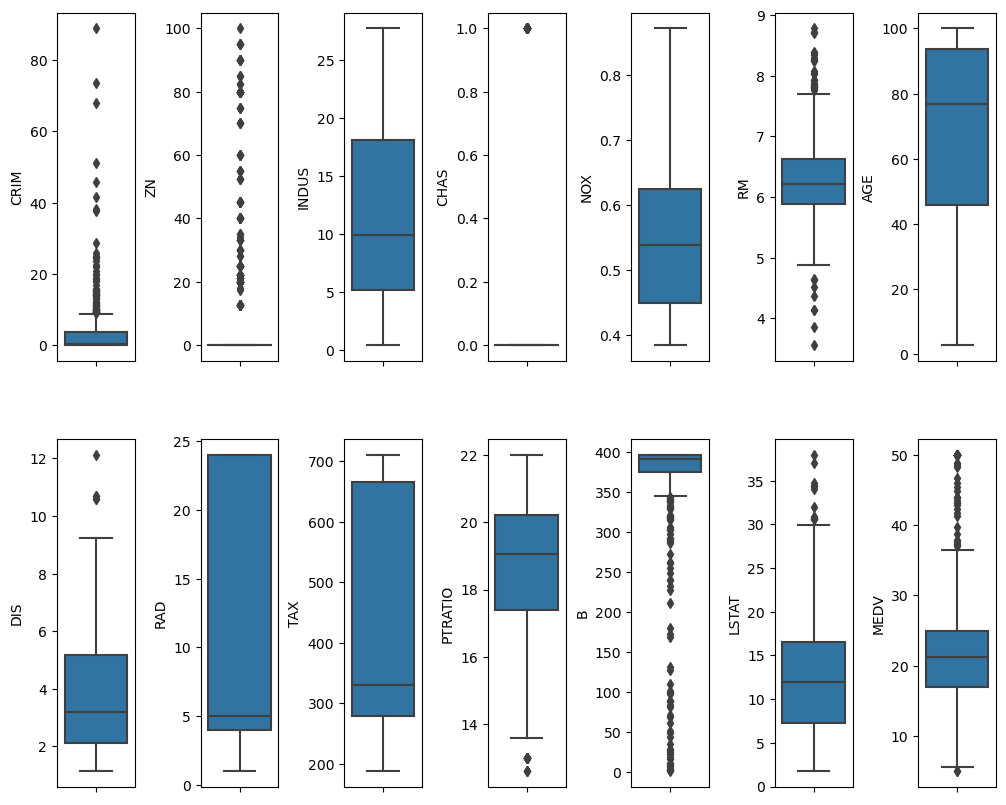

In [7]:
fig, ax = plt.subplots(nrows=2,ncols=7, figsize=(10,8))
ax = ax.flatten()
index = 0
for col, values in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5)

### Scaling data

Normal Scale of the data which has different scales for different features

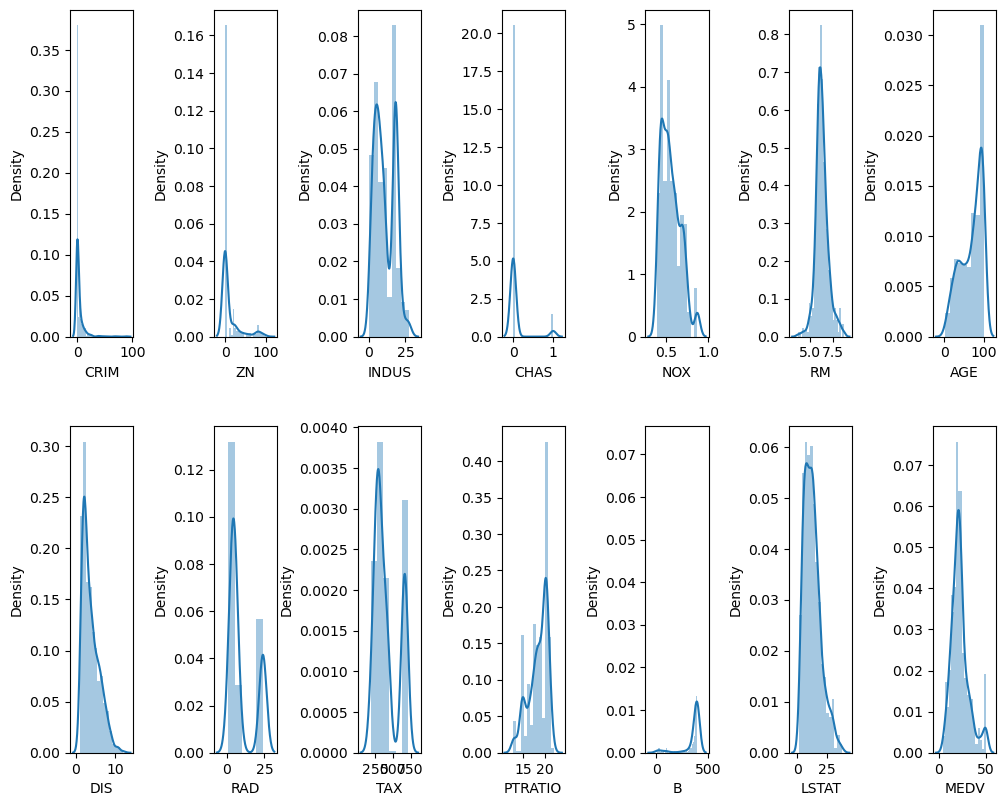

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=7, figsize=(10,8))
ax = ax.flatten()
index = 0
for col, values in df.items():
    sns.distplot(values, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=3)

In [9]:
mm = MinMaxScaler()
scaled_df = mm.fit_transform(df)

In [10]:
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.303130,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


Now all the features are in a range of 0 to 1 showing equal scaling of all

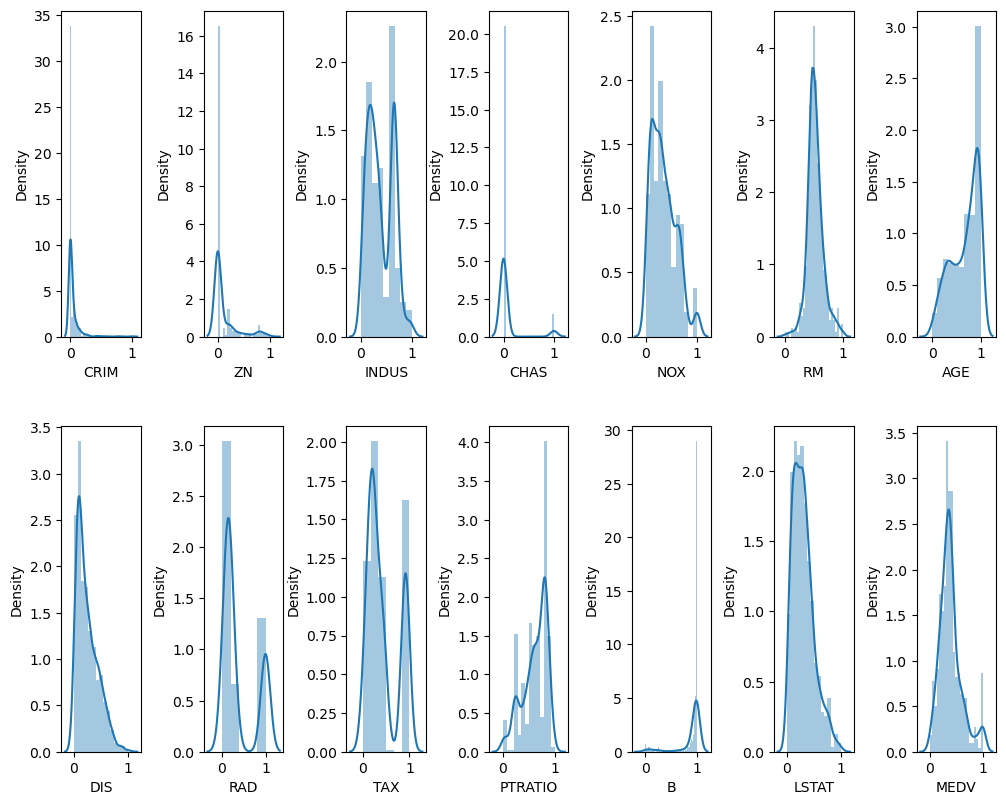

In [11]:
fig, ax = plt.subplots(nrows=2,ncols=7, figsize=(10,8))
ax = ax.flatten()
index = 0
for col, values in scaled_df.items():
    sns.distplot(values, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=3)

### Training the data

In [12]:
x = df.drop(df[['CHAS','DIS','MEDV']], axis=1)
y = df[['MEDV']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=43)

Linear Regression

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
MSE_lr = mean_squared_error(y_test, lr_pred)
R2_lr = r2_score(y_test, lr_pred)
print(f"MSE: {MSE_lr}")
print(f"R2_score: {R2_lr}")

MSE: 29.144434037245833
R2_score: 0.6459474317456089


Decision Tree Regressor

In [14]:
dtr = DecisionTreeRegressor(random_state=43)
dtr.fit(x_train, y_train)
dtr_pred = dtr.predict(x_test)
MSE_dtr = mean_squared_error(y_test, dtr_pred)
R2_dtr = r2_score(y_test, dtr_pred)
print(f"MSE: {MSE_dtr}")
print(f"R2_score: {R2_dtr}")

MSE: 19.687368421052632
R2_score: 0.7608338064573106


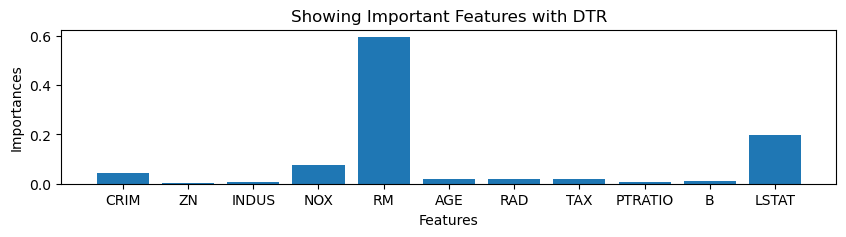

In [15]:
plt.figure(figsize=(10,2))
plt.bar(x.columns, dtr.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Showing Important Features with DTR")
plt.show()

DTR also shows RM and LSTAT as the important features

Gradient Boosting Regressor

In [16]:
gbr = GradientBoostingRegressor(random_state=43)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
MSE_gbr = mean_squared_error(y_test, gbr_pred)
R2_gbr = r2_score(y_test, gbr_pred)
print(f"MSE: {MSE_gbr}")
print(f"R2_score: {R2_gbr}")

MSE: 9.849366160469595
R2_score: 0.8803478777341975


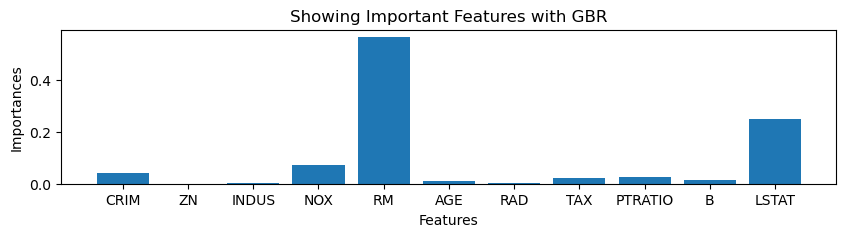

In [17]:
plt.figure(figsize=(10,2))
plt.bar(x.columns, gbr.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Showing Important Features with GBR")
plt.show()

Same features are important in GBR too.

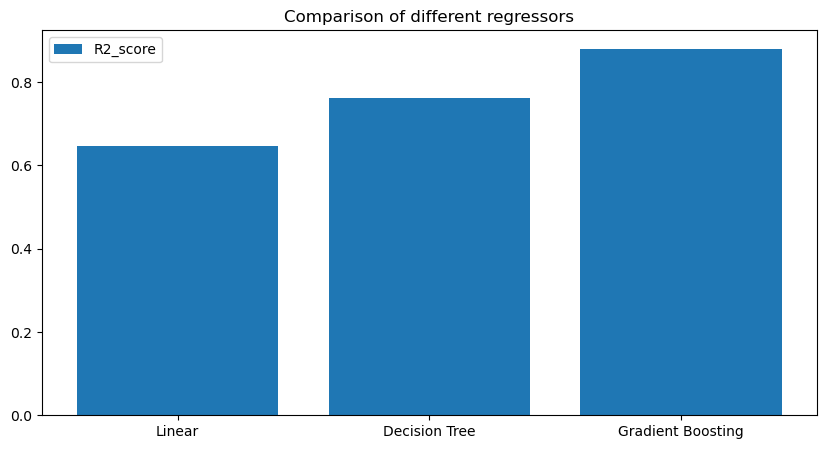

In [18]:
regr = ['Linear', 'Decision Tree', 'Gradient Boosting']
R2_scores = [R2_lr, R2_dtr, R2_gbr]
plt.figure(figsize = (10,5))
plt.title("Comparison of different regressors")
plt.bar(regr, R2_scores, label = 'R2_score')
plt.legend()
plt.show()

We select Gradient Boosting Regressorfor the prediction of new data.

### New data prediction

In [19]:
new_x = [[0.025,0,6.0, 0.5, 5.362, 20, 3, 200, 20, 390.3, 8]]

In [20]:
new_prediction_gbr = gbr.predict(new_x)
print(f"The house price prediction for new data is {new_prediction_gbr}")

The house price prediction for new data is [24.62693746]
